## Using areacellO

## CMIP6 model data using Pangeo catalog

In [2]:
# load useful packages
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
%matplotlib inline

In [3]:
# open cmip6 online catalogue
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [7]:
cat = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['Ofx'], 
                 variable_id=['areacello']) 
                 #member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r10i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
6,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r9i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
7,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r8i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
8,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r6i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200117
9,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r11i1p1f2,Ofx,areacello,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200408


In [8]:
# Create dictionary from the list of datasets we found
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [10]:
areacello = dset_dict[list(dset_dict.keys())[0]]

In [58]:
# choose one member_id
# remove excess dimensions like member IDs
areacello = areacello.isel(member_id = 0).squeeze()
areacello

<xarray.Dataset>
Dimensions:     (y: 294, x: 362, nvertex: 4)
Coordinates:
    bounds_lat  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon  (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon         (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    member_id   <U9 'r1i1p1f2'
Dimensions without coordinates: y, x, nvertex
Data variables:
    areacello   (y, x) float32 dask.array<chunksize=(294, 362), meta=np.ndarray>
Attributes: (12/47)
    intake_esm_varname:      ['areacello']
    sub_experiment_id:       none
    xios_commit:             1442-shuffle
    realm:                   ocean
    branch_method:           standard
    parent_experiment_id:    piControl
    ...                      ...
    dr2xml_version:          1.13
    references:              http://www.umr-cnrm.fr/cmip6/references
    data_specs_version:      01.00.21
    title:                   CNRM-ESM2-1 model output prepared for CMIP6 / CM...
    description:             CMIP6 historical
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.Ofx.gn

## Check
* are the areacello values the same for all the ensembles


In [55]:
import numpy as np
for mi in range(9):
    for mj in range(9):
        diff = (np.abs(areacello.isel(member_id = mi).areacello - areacello.isel(member_id = mj).areacello)).mean(dim=['y','x']).values
        print(mi,mj,diff)

# areacello.isel(member_id = 1).areacello.plot.pcolormesh()

0 0 0.0
0 1 0.0
0 2 0.0
0 3 0.0
0 4 0.0
0 5 0.0
0 6 0.0
0 7 0.0
0 8 0.0
1 0 0.0
1 1 0.0
1 2 0.0
1 3 0.0
1 4 0.0
1 5 0.0
1 6 0.0
1 7 0.0
1 8 0.0
2 0 0.0
2 1 0.0
2 2 0.0
2 3 0.0
2 4 0.0
2 5 0.0
2 6 0.0
2 7 0.0
2 8 0.0
3 0 0.0
3 1 0.0
3 2 0.0
3 3 0.0
3 4 0.0
3 5 0.0
3 6 0.0
3 7 0.0
3 8 0.0
4 0 0.0
4 1 0.0
4 2 0.0
4 3 0.0
4 4 0.0
4 5 0.0
4 6 0.0
4 7 0.0
4 8 0.0
5 0 0.0
5 1 0.0
5 2 0.0
5 3 0.0
5 4 0.0
5 5 0.0
5 6 0.0
5 7 0.0
5 8 0.0
6 0 0.0
6 1 0.0
6 2 0.0
6 3 0.0
6 4 0.0
6 5 0.0
6 6 0.0
6 7 0.0
6 8 0.0
7 0 0.0
7 1 0.0
7 2 0.0
7 3 0.0
7 4 0.0
7 5 0.0
7 6 0.0
7 7 0.0
7 8 0.0
8 0 0.0
8 1 0.0
8 2 0.0
8 3 0.0
8 4 0.0
8 5 0.0
8 6 0.0
8 7 0.0
8 8 0.0


## Select only the Greenland Sea area

In [59]:
GLarea = areacello.areacello.where((areacello.lat>=70) & (areacello.lat<=85) & (areacello.lon <= 10) & (areacello.lon >= -10), drop = True)
#GLarea.plot.contourf()

In [23]:
# Dont need to do this anymore
#GLarea_mean = GLarea.mean(dim = 'member_id', keep_attrs = True)

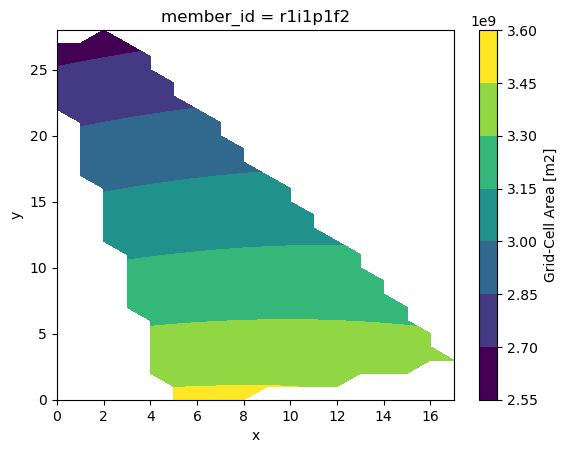

In [60]:
GLarea.plot.contourf()

## Import sic data

In [25]:
cat2 = col.search(source_id=['CNRM-ESM2-1'], 
                 experiment_id=['historical'], table_id=['SImon'], 
                 variable_id=['siconc']) 
                 #member_id=['r1i1p1f1'])
cat2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r1i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20181206
1,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r3i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
2,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r4i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
3,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r5i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
4,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r2i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20190125
5,CMIP,CNRM-CERFACS,CNRM-ESM2-1,historical,r11i1p1f2,SImon,siconc,gn,gs://cmip6/CMIP6/CMIP/CNRM-CERFACS/CNRM-ESM2-1...,NaN,20200408


In [34]:
# Create dictionary from the list of datasets we found
dsi_dict = cat2.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [35]:
si = dsi_dict[list(dsi_dict.keys())[0]]

In [36]:
si

<xarray.Dataset>
Dimensions:      (y: 294, x: 362, nvertex: 4, member_id: 6, time: 1980,
                  axis_nbounds: 2)
Coordinates:
    bounds_lat   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    bounds_lon   (y, x, nvertex) float64 dask.array<chunksize=(294, 362, 4), meta=np.ndarray>
    lat          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon          (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time         (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    time_bounds  (time, axis_nbounds) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
    type         |S255 ...
  * member_id    (member_id) <U9 'r1i1p1f2' 'r3i1p1f2' ... 'r11i1p1f2'
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    siconc       (member_id, time, y, x) float32 dask.array<chunksize=(1, 600, 294, 362), meta=np.ndarray>
Attributes: (12/48)
    intake_esm_varname:      ['siconc']
    sub_experiment_id:       none
    xios_commit:             1442-shuffle
    realm:                   seaIce
    branch_method:           standard
    parent_experiment_id:    piControl
    ...                      ...
    dr2xml_version:          1.13
    references:              http://www.umr-cnrm.fr/cmip6/references
    data_specs_version:      01.00.21
    title:                   CNRM-ESM2-1 model output prepared for CMIP6 / CM...
    description:             CMIP6 historical
    intake_esm_dataset_key:  CMIP.CNRM-CERFACS.CNRM-ESM2-1.historical.SImon.gn

## Average over ensemble means

In [37]:
# average over the ensemble means
si_mean = si['siconc'].mean(dim = ['member_id'], keep_attrs=True)

In [38]:
si_mean

<xarray.DataArray 'siconc' (time: 1980, y: 294, x: 362)>
dask.array<mean_agg-aggregate, shape=(1980, 294, 362), dtype=float32, chunksize=(600, 294, 362), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
    lon      (y, x) float64 dask.array<chunksize=(294, 362), meta=np.ndarray>
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type     |S255 ...
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello
    cell_methods:        area: mean where sea time: mean
    description:         Sea Ice Area Fraction (Ocean Grid)
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Sea Ice Area Fraction (Ocean Grid)
    online_operation:    average
    standard_name:       sea_ice_area_fraction
    units:               %

In [39]:
si_GL = si_mean.where((si_mean.lon>=-10) & (si_mean.lon<=10) & (si_mean.lat <=85 )  & (si_mean.lat >= 70),drop = True)

In [40]:
si_GL

<xarray.DataArray 'siconc' (time: 1980, y: 29, x: 18)>
dask.array<where, shape=(1980, 29, 18), dtype=float32, chunksize=(600, 29, 18), chunktype=numpy.ndarray>
Coordinates:
    lat      (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
    lon      (y, x) float64 dask.array<chunksize=(29, 18), meta=np.ndarray>
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type     |S6 b'typesi'
Dimensions without coordinates: y, x
Attributes:
    cell_measures:       area: areacello
    cell_methods:        area: mean where sea time: mean
    description:         Sea Ice Area Fraction (Ocean Grid)
    history:             none
    interval_operation:  1800 s
    interval_write:      1 month
    long_name:           Sea Ice Area Fraction (Ocean Grid)
    online_operation:    average
    standard_name:       sea_ice_area_fraction
    units:               %

In [41]:
si_weighted = (GLarea_mean*si_GL).sum(dim=('x','y'))/GLarea_mean.sum(dim=('x','y'))

In [42]:
si_weighted

<xarray.DataArray (time: 1980)>
dask.array<truediv, shape=(1980,), dtype=float32, chunksize=(600,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
    type     |S6 b'typesi'